In [ ]:
import numpy as np
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from treeple.datasets import make_trunk_classification
import ydf
import matplotlib.pyplot as plt
from treeple import ObliqueRandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
def prepare_dataframe(X, y):
    df = pd.DataFrame(X)
    df.columns = [str(i) for i in df.columns]  # Convert column names to strings
    df["target"] = y.astype(int)  # Append target column

    return df


n_samples = 1000
n_dim = 1784
X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim, n_informative=600, seed=0)


# Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
def plot_confusion(conf_matrix):
    disp_treeple = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp_treeple.plot()
    plt.title("Confusion Matrix for Treeple Predictions vs YDF Predictions")
    plt.xlabel("treeple_pred")
    plt.ylabel("YDF_pred")
    plt.show()

# YDF

Checklist for things need to take care of
- honest
- bootstrap
- missing_value
- oblique
- sparse oblique
- 

## YDF hyperparameters
adapt_bootstrap_size_ratio_for_maximum_training_duration
allow_na_conditions
bootstrap_size_ratio
bootstrap_training_dataset
categorical_algorithm
categorical_set_split_greedy_sampling
categorical_set_split_max_num_items
categorical_set_split_min_item_frequency
compute_oob_performances
compute_oob_variable_importances
growing_strategy
honest
honest_fixed_separation
honest_ratio_leaf_examples
in_split_min_examples_check
keep_non_leaf_label_distribution
max_depth
max_num_nodes
maximum_model_size_in_memory_in_bytes
maximum_training_duration_seconds
mhld_oblique_max_num_attributes
mhld_oblique_sample_attributes
min_examples
missing_value_policy
num_candidate_attributes
num_candidate_attributes_ratio
num_oob_variable_importances_permutations
num_trees
pure_serving_model
random_seed
sampling_with_replacement
sorting_strategy
sparse_oblique_max_num_projections
sparse_oblique_normalization
sparse_oblique_num_projections_exponent
sparse_oblique_projection_density_factor
sparse_oblique_weights
split_axis
uplift_min_examples_in_treatment
uplift_split_score
winner_take_all

https://ydf.readthedocs.io/en/stable/py_api/RandomForestLearner/

In [54]:
params_ydf = {}
params_ydf["label"] = 'target'
params_ydf["task"] = "CLASSIFICATION"
params_ydf["weights"] = None
params_ydf["ranking_group"] = None
params_ydf["uplift_treatment"] = None
params_ydf["features"] = None
params_ydf["include_all_columns"] = False
params_ydf["max_vocab_count"] = 2000
params_ydf["min_vocab_frequency"] = 5
params_ydf["discretize_numerical_columns"] = False
params_ydf["num_discretized_numerical_bins"] = 255
params_ydf["max_num_scanned_rows_to_infer_semantic"] = 100000
params_ydf["max_num_scanned_rows_to_compute_statistics"] = 100000
params_ydf["data_spec"] = None
params_ydf["adapt_bootstrap_size_ratio_for_maximum_training_duration"] = False
params_ydf["allow_na_conditions"] = False
params_ydf["bootstrap_size_ratio"] = 1.0
params_ydf["bootstrap_training_dataset"] = True
params_ydf["categorical_algorithm"] = "RANDOM"
params_ydf["categorical_set_split_greedy_sampling"] = 0.1
params_ydf["categorical_set_split_max_num_items"] = -1
params_ydf["categorical_set_split_min_item_frequency"] = 1
params_ydf["compute_oob_performances"] = True
params_ydf["compute_oob_variable_importances"] = False
params_ydf["growing_strategy"] = "LOCAL"
params_ydf["honest"] = False
params_ydf["honest_fixed_separation"] = False
params_ydf["honest_ratio_leaf_examples"] = 0.5
params_ydf["in_split_min_examples_check"] = True
params_ydf["keep_non_leaf_label_distribution"] = True
params_ydf["max_depth"] = MAX_DEPTH
params_ydf["max_num_nodes"] = -1.0 ###
params_ydf["maximum_model_size_in_memory_in_bytes"] = -1.0
params_ydf["maximum_training_duration_seconds"] = -1.0
# params_ydf["mhld_oblique_max_num_attributes"] = None
# params_ydf["mhld_oblique_sample_attributes"] = None
params_ydf["min_examples"] = 5
params_ydf["missing_value_policy"] = "GLOBAL_IMPUTATION"
params_ydf["num_candidate_attributes"] = 0
# params_ydf["num_candidate_attributes_ratio"] = None
params_ydf["num_oob_variable_importances_permutations"] = 1
params_ydf["num_trees"] = N_ESTIMATORS
# params_ydf["numerical_vector_sequence_num_examples"] = 1000
# params_ydf["numerical_vector_sequence_num_random_anchors"] = 100
params_ydf["pure_serving_model"] = False
params_ydf["random_seed"] = RANDOM_SEED
params_ydf["sampling_with_replacement"] = True
params_ydf["sorting_strategy"] = "PRESORT"
# params_ydf["sparse_oblique_max_num_features"] = None
# params_ydf["sparse_oblique_max_num_projections"] = None
# params_ydf["sparse_oblique_normalization"] = None
# params_ydf["sparse_oblique_num_projections_exponent"] = None
# params_ydf["sparse_oblique_projection_density_factor"] = None
# params_ydf["sparse_oblique_weights"] = None
# params_ydf["sparse_oblique_weights_integer_maximum"] = None
# params_ydf["sparse_oblique_weights_integer_minimum"] = None
# params_ydf["sparse_oblique_weights_power_of_two_max_exponent"] = None
# params_ydf["sparse_oblique_weights_power_of_two_min_exponent"] = None
params_ydf["split_axis"] = "AXIS_ALIGNED"
params_ydf["uplift_min_examples_in_treatment"] = 5
params_ydf["uplift_split_score"] = "KULLBACK_LEIBLER"
params_ydf["winner_take_all"] = True
# params_ydf["working_dir"] = None
# params_ydf["num_threads"] = None
# params_ydf["tuner"] = None
# params_ydf["feature_selector"] = None



## original version

In [3]:
# Shared hyperparameters that used for both models
MAX_DEPTH = 10
N_ESTIMATORS = 500
RANDOM_SEED = 42
N_JOBS=-1
BOOTSTRAP = True

### ydf ###
params_ydf = dict()
params_ydf["label"] = "target"
params_ydf["max_depth"] = MAX_DEPTH
params_ydf["num_trees"] = N_ESTIMATORS
params_ydf["random_seed"] = RANDOM_SEED
params_ydf["honest"] = False
params_ydf["bootstrap_size_ratio"] = 1.0
params_ydf["bootstrap_training_dataset"] = BOOTSTRAP
params_ydf["categorical_algorithm"] = "ONE_HOT"
params_ydf["split_axis"] = "SPARSE_OBLIQUE"
params_ydf["compute_oob_performances"] = False
params_ydf["compute_oob_variable_importances"] = False
params_ydf["max_num_nodes"] = None
params_ydf["growing_strategy"] = "LOCAL"
params_ydf["sparse_oblique_weights"] = "CONTINUOUS"
params_ydf["sparse_oblique_projection_density_factor"] = 1.0
params_ydf["sparse_oblique_normalization"] = "MIN_MAX" ###
params_ydf["sparse_oblique_max_num_projections"] = 70 # modify this, find in sourse code in treeple

### treeple ObliqueRandomForestClassifier ###
params_treeple = {}
params_treeple["n_estimators"] = N_ESTIMATORS
params_treeple["criterion"] = "entropy"
params_treeple["max_depth"] = None
params_treeple["min_samples_split"] = 2
params_treeple["min_samples_leaf"] = 1
params_treeple["min_weight_fraction_leaf"] = 0.0
params_treeple["max_features"] = 100    #"sqrt"
params_treeple["max_leaf_nodes"] = None
params_treeple["min_impurity_decrease"] = 0.0
params_treeple["bootstrap"] = BOOTSTRAP
params_treeple["oob_score"] = False
params_treeple["n_jobs"] = N_JOBS
params_treeple["random_state"] = None
params_treeple["verbose"] = 0
params_treeple["warm_start"] = False
params_treeple["class_weight"] = None
params_treeple["max_samples"] = None
params_treeple["feature_combinations"] = None

## updated version

In [4]:
# Shared hyperparameters that used for both models
MAX_DEPTH = 10
N_ESTIMATORS = 500
RANDOM_SEED = 42
N_JOBS=-1
BOOTSTRAP = True

### ydf ###
params_ydf = dict()
params_ydf["label"] = "target"
params_ydf["max_depth"] = MAX_DEPTH
params_ydf["num_trees"] = N_ESTIMATORS
params_ydf["random_seed"] = RANDOM_SEED
params_ydf["honest"] = False
params_ydf["bootstrap_size_ratio"] = 1.0
params_ydf["bootstrap_training_dataset"] = BOOTSTRAP
params_ydf["categorical_algorithm"] = "ONE_HOT"
params_ydf["split_axis"] = "SPARSE_OBLIQUE"
params_ydf["compute_oob_performances"] = False
params_ydf["compute_oob_variable_importances"] = False
params_ydf["max_num_nodes"] = None
params_ydf["growing_strategy"] = "BEST_FIRST_GLOBAL"
params_ydf["num_candidate_attributes"] = 1  #0 equivalent to sqrt max_features in treeple
params_ydf["sorting_strategy"] = "IN_NODE" ###
# sparse oblique params
params_ydf["sparse_oblique_weights"] = "CONTINUOUS"
params_ydf["sparse_oblique_projection_density_factor"] = 1.0
params_ydf["sparse_oblique_normalization"] = "MIN_MAX"
params_ydf["sparse_oblique_max_num_projections"] = 6000 # modify this, find in sourse code in treeple
params_ydf["sparse_oblique_num_projections_exponent"] = 1.0   #2.0
params_ydf["sampling_with_replacement"] = False

### treeple ObliqueRandomForestClassifier ###
params_treeple = {}
params_treeple["n_estimators"] = N_ESTIMATORS
params_treeple["criterion"] = "entropy"
params_treeple["max_depth"] = None
params_treeple["min_samples_split"] = 2
params_treeple["min_samples_leaf"] = 1
params_treeple["min_weight_fraction_leaf"] = 0.0
params_treeple["max_features"] = 1.0 #"sqrt" #100
params_treeple["max_leaf_nodes"] = None
params_treeple["min_impurity_decrease"] = 0.0
params_treeple["bootstrap"] = BOOTSTRAP
params_treeple["oob_score"] = False
params_treeple["n_jobs"] = N_JOBS
params_treeple["random_state"] = RANDOM_SEED
params_treeple["verbose"] = 0
params_treeple["warm_start"] = False
params_treeple["class_weight"] = None
params_treeple["max_samples"] = None
params_treeple["feature_combinations"] = 1.0


## Note
1. max depth
2. number of trees
3. random seed
4. honest = False
5. bootstrap, size = 1.0,
6. sparse oblique
7. sparse oblique max features = 100
8. out-of-bag feature importance = False, variance importance
9. unlimited max num nodes in the tree
10. growing strategy - local
11. one-hot categorical algorithm
12. sparse_oblique_weights set to "CONTINUOUS", oblique weights being sampled in [-1,1]
13. sparse_oblique_projection_density_factor, lamda = 1
14. sampling without replacement

## Not sure from ydf
1. categorical_set_split_greedy_sampling
2. criterion, entropy/ gini (not found in ydf)
3. sparse_oblique_max_num_projections, maximum number of projection (The paper "Sparse Projection Oblique Random Forests" (Tomita et al, 2020) does not define this hyperparameter.)

In [92]:
# # --- Train YDF ---

n_samples = 1000
n_dim = 1784
X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim, n_informative=600, seed=0)

# Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

df_train = prepare_dataframe(X_train, y_train)
df_test = prepare_dataframe(X_test, y_test)

learner = ydf.RandomForestLearner(**params_ydf)
start_time = time.time()
ydf_model = learner.train(df_train)
time_ydf = time.time() - start_time
y_pred = ydf_model.predict(df_test)
y_pred_class = (y_pred >= 0.5).astype(int) 

acc_ydf = accuracy_score(y_test, y_pred_class)

print(f"YDF | Dim: {n_dim} | Accuracy: {acc_ydf:.4f} | Train Time: {time_ydf:.4f} sec")


Train model on 800 examples
Model trained in 0:01:11.074698
YDF | Dim: 1784 | Accuracy: 0.7550 | Train Time: 71.2330 sec


# Treeple

In [3]:

def train_and_evaluate(model, model_name, X_train, X_test, y_train, y_test):
    """
    Train a given model and evaluate its accuracy and training time.
    """
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    y_pred = model.predict(X_test)
    if isinstance(y_pred[0], np.ndarray):  # Some models return probabilities
        y_pred = np.argmax(y_pred, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name}: Accuracy = {accuracy:.4f}, Training Time = {train_time:.4f} sec")
    
    return accuracy, train_time, y_pred

In [93]:
from treeple import ObliqueRandomForestClassifier

treeple_model = ObliqueRandomForestClassifier(**params_treeple)
acc_treeple, time_treeple, pred_treeple = train_and_evaluate(treeple_model, "Treeple", X_train, X_test, y_train, y_test)

Treeple: Accuracy = 0.8000, Training Time = 146.5527 sec


In [77]:
treeple_model.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'feature_combinations': 1.0,
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## compare outputs

In [79]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for Treeple predictions
conf_matrix_treeple = confusion_matrix(y_test, pred_treeple)
print("Confusion Matrix for Treeple Predictions:")
print(conf_matrix_treeple)

# Generate confusion matrix for YDF predictions
conf_matrix_ydf = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix for YDF Predictions:")
print(conf_matrix_ydf)

Confusion Matrix for Treeple Predictions:
[[76 24]
 [16 84]]
Confusion Matrix for YDF Predictions:
[[76 24]
 [22 78]]


In [94]:
conf_matrix = confusion_matrix(pred_treeple, y_pred_class)
print("Confusion Matrix for Treeple vs YDF Predictions:")
print(conf_matrix)

Confusion Matrix for Treeple vs YDF Predictions:
[[86  6]
 [13 95]]


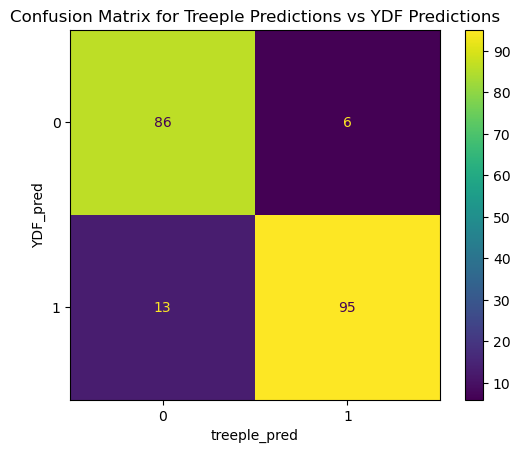

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay

disp_treeple = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp_treeple.plot()
plt.title("Confusion Matrix for Treeple Predictions vs YDF Predictions")
plt.xlabel("treeple_pred")
plt.ylabel("YDF_pred")
plt.show()

In [ ]:


# Calculate F1 score for Treeple predictions
f1_treeple = f1_score(y_pred_class, pred_treeple)
print(f"F1 Score for comparison: {f1_treeple:.4f}")


F1 Score for comparison: 0.9091


## other params

In [ ]:
### treeple HonestForestClassifier ###
params_treeple = dict()
params_treeple["n_estimators"] = 100
params_treeple["criterion"] = "entropy"  ###
params_treeple["splitter"] = "best"
params_treeple["max_depth"] = MAX_DEPTH
params_treeple["min_samples_split"] = 2
params_treeple["min_samples_leaf"] = 1
params_treeple["min_weight_fraction_leaf"] = 0.0
params_treeple["max_features"] = "sqrt"
params_treeple["max_leaf_nodes"] = None
params_treeple["min_impurity_decrease"] = 0.0
params_treeple["bootstrap"] = True
params_treeple["oob_score"] = False
params_treeple["n_jobs"] = -1
params_treeple["random_state"] = None
params_treeple["verbose"] = 0
params_treeple["warm_start"] = False
params_treeple["class_weight"] = None
params_treeple["ccp_alpha"] = 0.0
params_treeple["max_samples"] = None
params_treeple["honest_prior"] = "ignore"
params_treeple["honest_fraction"] = 0.5
params_treeple["honest_method"] = "apply"
params_treeple["tree_estimator"] = None
params_treeple["stratify"] = False

In [ ]:
### ydf ###
params_ydf_default = dict()
params_ydf_default["label"] = "target"
# params_ydf_default["max_depth"] = MAX_DEPTH
params_ydf_default["num_trees"] = N_ESTIMATORS
# params_ydf_default["random_seed"] = RANDOM_SEED
# params_ydf_default["honest"] = False
# params_ydf_default["bootstrap_size_ratio"] = 1.0
# params_ydf_default["bootstrap_training_dataset"] = BOOTSTRAP
# params_ydf_default["categorical_algorithm"] = "ONE_HOT"
# params_ydf_default["split_axis"] = "SPARSE_OBLIQUE"
# params_ydf_default["compute_oob_performances"] = False
# params_ydf_default["compute_oob_variable_importances"] = False
# params_ydf_default["max_num_nodes"] = None
# params_ydf_default["growing_strategy"] = "LOCAL"
# params_ydf_default["sparse_oblique_weights"] = "CONTINUOUS"
# params_ydf_default["sparse_oblique_projection_density_factor"] = 1.0
# params_ydf_default["sparse_oblique_normalization"] = "MIN_MAX" ###
# params_ydf_default["sparse_oblique_max_num_projections"] = 70 # modify this, find in sourse code in treeple

### treeple ObliqueRandomForestClassifier ###
params_treeple_default = {}
params_treeple_default["n_estimators"] = N_ESTIMATORS
# params_treeple_default["criterion"] = "entropy"
# params_treeple_default["max_depth"] = None
# params_treeple_default["min_samples_split"] = 2
# params_treeple_default["min_samples_leaf"] = 1
# params_treeple_default["min_weight_fraction_leaf"] = 0.0
# params_treeple_default["max_features"] = 100    #"sqrt"
# params_treeple_default["max_leaf_nodes"] = None
# params_treeple_default["min_impurity_decrease"] = 0.0
# params_treeple_default["bootstrap"] = BOOTSTRAP
# params_treeple_default["oob_score"] = False
# params_treeple_default["n_jobs"] = N_JOBS
# params_treeple_default["random_state"] = None
# params_treeple_default["verbose"] = 0
# params_treeple_default["warm_start"] = False
# params_treeple_default["class_weight"] = None
# params_treeple_default["max_samples"] = None
# params_treeple_default["feature_combinations"] = None

# Trunk simulation

In [98]:
#num_dims = [100, 500, 1000, 1500, 2000, 3000, 4000, 10000]
num_dims = [5, 10,  20, 50, 100, 200, 400, 600, 800, 1000]
accs_ydf = []
times_ydf = []
accs_treeple = []
times_treeple = []
f1_scores = []
n_rep = 5

for n_dim in num_dims:
    print(f"Dimension: {n_dim}")

    X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim, n_informative=600, seed=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    df_train = prepare_dataframe(X_train, y_train)
    df_test = prepare_dataframe(X_test, y_test)

    # --- Train YDF ---
    acc_temp=0
    time_temp=0
    for _ in range(n_rep):

        learner = ydf.RandomForestLearner(**params_ydf)
        start_time = time.time()
        ydf_model = learner.train(df_train)
        time_ydf = time.time() - start_time
        y_pred = ydf_model.predict(df_test)
        y_pred = (y_pred >= 0.5).astype(int) 

        acc_ydf = accuracy_score(y_test, y_pred)
        acc_temp+=acc_ydf
        time_temp+=time_ydf
    accs_ydf.append(acc_temp/n_rep)
    times_ydf.append(time_temp/n_rep)

    # --- Train Treeple ---
    acc_temp=0
    time_temp=0
    for _ in range(n_rep):
        treeple_model = ObliqueRandomForestClassifier(**params_treeple)
        acc_treeple, time_treeple, _ = train_and_evaluate(treeple_model, "Treeple", X_train, X_test, y_train, y_test)
        acc_temp+=acc_treeple
        time_temp+=time_treeple
    accs_treeple.append(acc_temp/n_rep)
    times_treeple.append(time_temp/n_rep)

Dimension: 5
Train model on 800 examples
Model trained in 0:00:00.060984
Train model on 800 examples
Model trained in 0:00:00.064553
Train model on 800 examples


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 5. Setting n_informative to n_dim.
  warnings.warn(


Model trained in 0:00:00.059043
Train model on 800 examples
Model trained in 0:00:00.055611
Train model on 800 examples
Model trained in 0:00:00.053539
Treeple: Accuracy = 0.7700, Training Time = 0.3921 sec
Treeple: Accuracy = 0.7700, Training Time = 0.3860 sec
Treeple: Accuracy = 0.7700, Training Time = 0.3869 sec
Treeple: Accuracy = 0.7700, Training Time = 0.3743 sec
Treeple: Accuracy = 0.7700, Training Time = 0.3865 sec
Dimension: 10
Train model on 800 examples
Model trained in 0:00:00.098080
Train model on 800 examples
Model trained in 0:00:00.090567


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 10. Setting n_informative to n_dim.
  warnings.warn(


Train model on 800 examples
Model trained in 0:00:00.092563
Train model on 800 examples
Model trained in 0:00:00.092563
Train model on 800 examples
Model trained in 0:00:00.092572
Treeple: Accuracy = 0.7850, Training Time = 0.4069 sec
Treeple: Accuracy = 0.7850, Training Time = 0.4179 sec
Treeple: Accuracy = 0.7850, Training Time = 0.4358 sec
Treeple: Accuracy = 0.7850, Training Time = 0.4159 sec
Treeple: Accuracy = 0.7850, Training Time = 0.4483 sec
Dimension: 20
Train model on 800 examples
Model trained in 0:00:00.188159


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 20. Setting n_informative to n_dim.
  warnings.warn(


Train model on 800 examples
Model trained in 0:00:00.186139
Train model on 800 examples
Model trained in 0:00:00.186157
Train model on 800 examples
Model trained in 0:00:00.169690
Train model on 800 examples
Model trained in 0:00:00.174624
Treeple: Accuracy = 0.7500, Training Time = 0.4731 sec
Treeple: Accuracy = 0.7500, Training Time = 0.4693 sec
Treeple: Accuracy = 0.7500, Training Time = 0.4793 sec
Treeple: Accuracy = 0.7500, Training Time = 0.4968 sec
Treeple: Accuracy = 0.7500, Training Time = 0.4786 sec
Dimension: 50
Train model on 800 examples


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 50. Setting n_informative to n_dim.
  warnings.warn(


Model trained in 0:00:00.428464
Train model on 800 examples
Model trained in 0:00:00.428085
Train model on 800 examples
Model trained in 0:00:00.421196
Train model on 800 examples
Model trained in 0:00:00.421879
Train model on 800 examples
Model trained in 0:00:00.425225
Treeple: Accuracy = 0.8200, Training Time = 0.7998 sec
Treeple: Accuracy = 0.8200, Training Time = 0.8191 sec
Treeple: Accuracy = 0.8200, Training Time = 0.8473 sec
Treeple: Accuracy = 0.8200, Training Time = 0.7951 sec
Treeple: Accuracy = 0.8200, Training Time = 0.7849 sec
Dimension: 100
Train model on 800 examples


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 100. Setting n_informative to n_dim.
  warnings.warn(


Model trained in 0:00:00.997212
Train model on 800 examples
Model trained in 0:00:00.943012
Train model on 800 examples
Model trained in 0:00:00.974513
Train model on 800 examples
Model trained in 0:00:00.989354
Train model on 800 examples
Model trained in 0:00:01.006627
Treeple: Accuracy = 0.7700, Training Time = 1.4881 sec
Treeple: Accuracy = 0.7700, Training Time = 1.4745 sec
Treeple: Accuracy = 0.7700, Training Time = 1.4347 sec
Treeple: Accuracy = 0.7700, Training Time = 1.4495 sec
Treeple: Accuracy = 0.7700, Training Time = 1.4676 sec
Dimension: 200
Train model on 800 examples


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 200. Setting n_informative to n_dim.
  warnings.warn(


Model trained in 0:00:02.290658
Train model on 800 examples
Model trained in 0:00:02.408862
Train model on 800 examples
Model trained in 0:00:02.411612
Train model on 800 examples
Model trained in 0:00:02.510242
Train model on 800 examples
Model trained in 0:00:02.336160
Treeple: Accuracy = 0.7900, Training Time = 2.9509 sec
Treeple: Accuracy = 0.7900, Training Time = 2.9677 sec
Treeple: Accuracy = 0.7900, Training Time = 2.9550 sec
Treeple: Accuracy = 0.7900, Training Time = 3.0312 sec
Treeple: Accuracy = 0.7900, Training Time = 3.2074 sec
Dimension: 400
Train model on 800 examples


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 400. Setting n_informative to n_dim.
  warnings.warn(


Model trained in 0:00:06.266501
Train model on 800 examples
Model trained in 0:00:06.136929
Train model on 800 examples
Model trained in 0:00:06.216887
Train model on 800 examples
Model trained in 0:00:06.232166
Train model on 800 examples
Model trained in 0:00:06.277122
Treeple: Accuracy = 0.7700, Training Time = 6.2530 sec
Treeple: Accuracy = 0.7700, Training Time = 6.3429 sec
Treeple: Accuracy = 0.7700, Training Time = 6.0129 sec
Treeple: Accuracy = 0.7700, Training Time = 6.2144 sec
Treeple: Accuracy = 0.7700, Training Time = 6.0814 sec
Dimension: 600
Train model on 800 examples
Model trained in 0:00:11.074170
Train model on 800 examples
Model trained in 0:00:11.169362
Train model on 800 examples
Model trained in 0:00:11.291509
Train model on 800 examples
Model trained in 0:00:11.611207
Train model on 800 examples
Model trained in 0:00:11.213416
Treeple: Accuracy = 0.7950, Training Time = 9.8521 sec
Treeple: Accuracy = 0.7950, Training Time = 9.9726 sec
Treeple: Accuracy = 0.7950, 

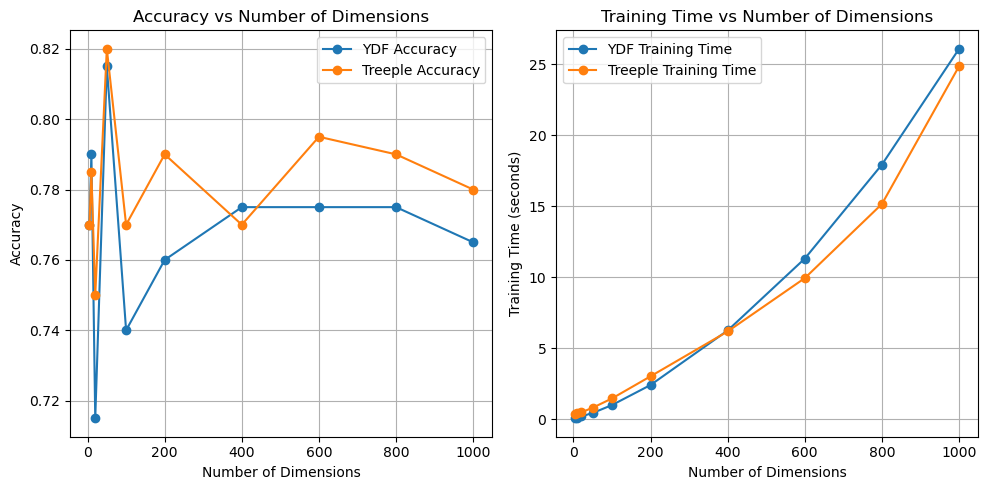

In [99]:


fig, ax1 = plt.subplots(1,2, figsize=(10, 5))

# Plot accuracy
ax1[0].plot(num_dims, accs_ydf, label='YDF Accuracy', marker='o')
ax1[0].plot(num_dims, accs_treeple, label='Treeple Accuracy', marker='o')
ax1[0].set_xlabel('Number of Dimensions')
ax1[0].set_ylabel('Accuracy')
ax1[0].set_title('Accuracy vs Number of Dimensions')
ax1[0].legend()
ax1[0].grid(True)

# Plot training time
ax1[1].plot(num_dims, times_ydf, label='YDF Training Time', marker='o')
ax1[1].plot(num_dims, times_treeple, label='Treeple Training Time', marker='o')
ax1[1].set_xlabel('Number of Dimensions')
ax1[1].set_ylabel('Training Time (seconds)')
ax1[1].set_title('Training Time vs Number of Dimensions')
ax1[1].legend()
ax1[1].grid(True)

plt.tight_layout()
plt.show()

## compare confusion matrix f1 score

In [103]:
#num_dims = [100, 500, 1000, 1500, 2000, 3000, 4000, 10000]
num_dims = [5, 10,  20, 50, 100, 200, 400, 600, 800, 1000, 1200, 1500, 2000]
accs_ydf = []
times_ydf = []
accs_treeple = []
times_treeple = []
f1_scores = []
n_rep = 5

for n_dim in num_dims:
    print(f"Dimension: {n_dim}")

    X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim, n_informative=600, seed=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    df_train = prepare_dataframe(X_train, y_train)
    df_test = prepare_dataframe(X_test, y_test)

    
    acc_temp_ydf=0
    time_temp_ydf=0

    acc_temp_treeple=0
    time_temp_treeple=0

    f1_temp=0

    for _ in range(n_rep):
        # --- Train YDF ---
        learner = ydf.RandomForestLearner(**params_ydf)
        start_time = time.time()
        ydf_model = learner.train(df_train)
        time_ydf = time.time() - start_time
        pred_ydf = ydf_model.predict(df_test)
        pred_ydf = (pred_ydf >= 0.5).astype(int) 

        acc_ydf = accuracy_score(y_test, pred_ydf)
        acc_temp_ydf+=acc_ydf
        time_temp_ydf+=time_ydf
    
        # --- Train Treeple ---
        treeple_model = ObliqueRandomForestClassifier(**params_treeple)
        acc_treeple, time_treeple, pred_treeple = train_and_evaluate(treeple_model, "Treeple", X_train, X_test, y_train, y_test)
        acc_temp_treeple+=acc_treeple
        time_temp_treeple+=time_treeple

        # Calculate F1 score for two predictions
        f1_compare = f1_score(pred_ydf, pred_treeple)
        f1_temp+=f1_compare

    accs_ydf.append(acc_temp_ydf/n_rep)
    times_ydf.append(time_temp_ydf/n_rep)

    accs_treeple.append(acc_temp_treeple/n_rep)
    times_treeple.append(time_temp_treeple/n_rep)

    f1_scores.append(f1_temp/n_rep)

Dimension: 5
Train model on 800 examples
Model trained in 0:00:00.059958


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 5. Setting n_informative to n_dim.
  warnings.warn(


Treeple: Accuracy = 0.7700, Training Time = 0.4436 sec
Train model on 800 examples
Model trained in 0:00:00.050037
Treeple: Accuracy = 0.7700, Training Time = 0.3897 sec
Train model on 800 examples
Model trained in 0:00:00.049033
Treeple: Accuracy = 0.7700, Training Time = 0.3775 sec
Train model on 800 examples
Model trained in 0:00:00.050051
Treeple: Accuracy = 0.7700, Training Time = 0.3778 sec
Train model on 800 examples
Model trained in 0:00:00.049038
Treeple: Accuracy = 0.7700, Training Time = 0.3930 sec
Dimension: 10
Train model on 800 examples
Model trained in 0:00:00.088561


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 10. Setting n_informative to n_dim.
  warnings.warn(


Treeple: Accuracy = 0.7850, Training Time = 0.4144 sec
Train model on 800 examples
Model trained in 0:00:00.087061
Treeple: Accuracy = 0.7850, Training Time = 0.4002 sec
Train model on 800 examples
Model trained in 0:00:00.085068
Treeple: Accuracy = 0.7850, Training Time = 0.4072 sec
Train model on 800 examples
Model trained in 0:00:00.086562
Treeple: Accuracy = 0.7850, Training Time = 0.4041 sec
Train model on 800 examples
Model trained in 0:00:00.085551
Treeple: Accuracy = 0.7850, Training Time = 0.4036 sec
Dimension: 20
Train model on 800 examples
Model trained in 0:00:00.175451


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 20. Setting n_informative to n_dim.
  warnings.warn(


Treeple: Accuracy = 0.7500, Training Time = 0.4874 sec
Train model on 800 examples
Model trained in 0:00:00.182182
Treeple: Accuracy = 0.7500, Training Time = 0.4748 sec
Train model on 800 examples
Model trained in 0:00:00.169434
Treeple: Accuracy = 0.7500, Training Time = 0.4768 sec
Train model on 800 examples
Model trained in 0:00:00.168113
Treeple: Accuracy = 0.7500, Training Time = 0.4802 sec
Train model on 800 examples
Model trained in 0:00:00.164609
Treeple: Accuracy = 0.7500, Training Time = 0.4685 sec
Dimension: 50
Train model on 800 examples


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 50. Setting n_informative to n_dim.
  warnings.warn(


Model trained in 0:00:00.446254
Treeple: Accuracy = 0.8200, Training Time = 0.7729 sec
Train model on 800 examples
Model trained in 0:00:00.419285
Treeple: Accuracy = 0.8200, Training Time = 0.7763 sec
Train model on 800 examples
Model trained in 0:00:00.420488
Treeple: Accuracy = 0.8200, Training Time = 0.7766 sec
Train model on 800 examples
Model trained in 0:00:00.421277
Treeple: Accuracy = 0.8200, Training Time = 0.7715 sec
Train model on 800 examples
Model trained in 0:00:00.429788
Treeple: Accuracy = 0.8200, Training Time = 0.7993 sec
Dimension: 100
Train model on 800 examples


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 100. Setting n_informative to n_dim.
  warnings.warn(


Model trained in 0:00:00.957875
Treeple: Accuracy = 0.7700, Training Time = 1.4222 sec
Train model on 800 examples
Model trained in 0:00:00.945119
Treeple: Accuracy = 0.7700, Training Time = 1.4449 sec
Train model on 800 examples
Model trained in 0:00:00.933842
Treeple: Accuracy = 0.7700, Training Time = 1.4378 sec
Train model on 800 examples
Model trained in 0:00:00.937992
Treeple: Accuracy = 0.7700, Training Time = 1.4629 sec
Train model on 800 examples
Model trained in 0:00:01.007080
Treeple: Accuracy = 0.7700, Training Time = 1.5330 sec
Dimension: 200
Train model on 800 examples


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 200. Setting n_informative to n_dim.
  warnings.warn(


Model trained in 0:00:02.384910
Treeple: Accuracy = 0.7900, Training Time = 2.9448 sec
Train model on 800 examples
Model trained in 0:00:02.356502
Treeple: Accuracy = 0.7900, Training Time = 2.9583 sec
Train model on 800 examples
Model trained in 0:00:02.241916
Treeple: Accuracy = 0.7900, Training Time = 2.8562 sec
Train model on 800 examples
Model trained in 0:00:02.233224
Treeple: Accuracy = 0.7900, Training Time = 2.8073 sec
Train model on 800 examples
Model trained in 0:00:02.247998
Treeple: Accuracy = 0.7900, Training Time = 2.8084 sec
Dimension: 400
Train model on 800 examples


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 400. Setting n_informative to n_dim.
  warnings.warn(


Model trained in 0:00:06.246567
Treeple: Accuracy = 0.7700, Training Time = 6.2175 sec
Train model on 800 examples
Model trained in 0:00:06.013391
Treeple: Accuracy = 0.7700, Training Time = 6.1531 sec
Train model on 800 examples
Model trained in 0:00:05.988702
Treeple: Accuracy = 0.7700, Training Time = 6.1432 sec
Train model on 800 examples
Model trained in 0:00:05.984381
Treeple: Accuracy = 0.7700, Training Time = 6.2788 sec
Train model on 800 examples
Model trained in 0:00:06.075164
Treeple: Accuracy = 0.7700, Training Time = 6.2369 sec
Dimension: 600
Train model on 800 examples
Model trained in 0:00:11.483331
Treeple: Accuracy = 0.7950, Training Time = 11.0790 sec
Train model on 800 examples
Model trained in 0:00:11.257236
Treeple: Accuracy = 0.7950, Training Time = 10.8008 sec
Train model on 800 examples
Model trained in 0:00:11.228784
Treeple: Accuracy = 0.7950, Training Time = 10.8349 sec
Train model on 800 examples
Model trained in 0:00:11.233094
Treeple: Accuracy = 0.7950, Tr

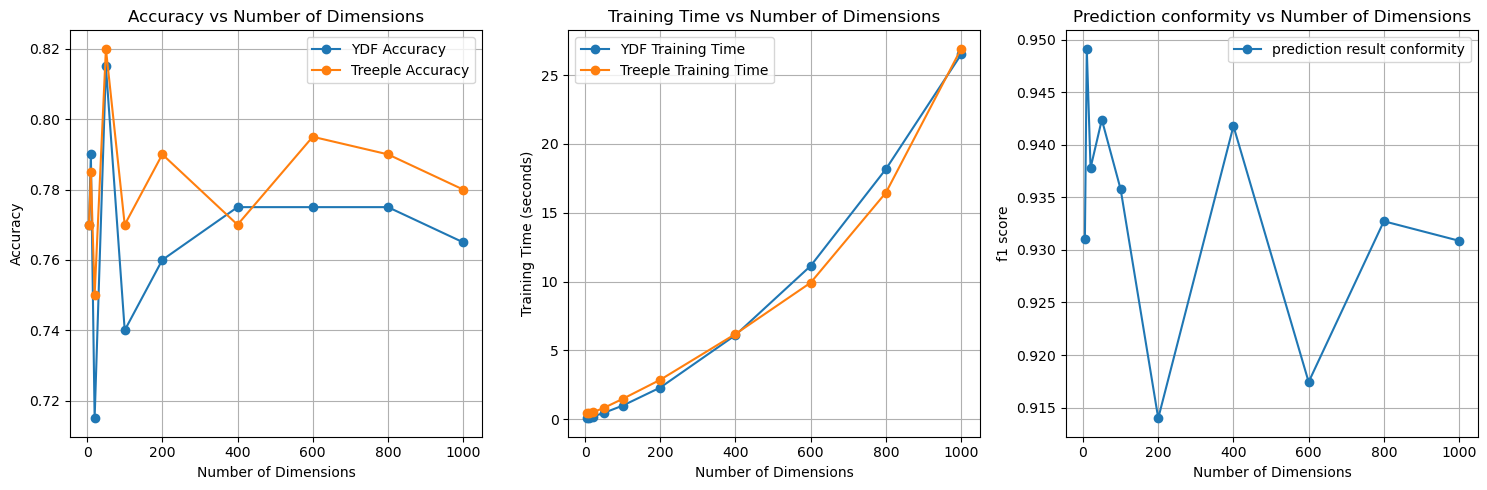

In [102]:


fig, ax1 = plt.subplots(1,3, figsize=(15, 5))

# Plot accuracy
ax1[0].plot(num_dims, accs_ydf, label='YDF Accuracy', marker='o')
ax1[0].plot(num_dims, accs_treeple, label='Treeple Accuracy', marker='o')
ax1[0].set_xlabel('Number of Dimensions')
ax1[0].set_ylabel('Accuracy')
ax1[0].set_title('Accuracy vs Number of Dimensions')
ax1[0].legend()
ax1[0].grid(True)

# Plot training time
ax1[1].plot(num_dims, times_ydf, label='YDF Training Time', marker='o')
ax1[1].plot(num_dims, times_treeple, label='Treeple Training Time', marker='o')
ax1[1].set_xlabel('Number of Dimensions')
ax1[1].set_ylabel('Training Time (seconds)')
ax1[1].set_title('Training Time vs Number of Dimensions')
ax1[1].legend()
ax1[1].grid(True)

# Plot training time
ax1[2].plot(num_dims, f1_scores, label='prediction result conformity', marker='o')
ax1[2].set_xlabel('Number of Dimensions')
ax1[2].set_ylabel('f1 score')
ax1[2].set_title('Prediction conformity vs Number of Dimensions')
ax1[2].legend()
ax1[2].grid(True)

plt.tight_layout()
plt.show()

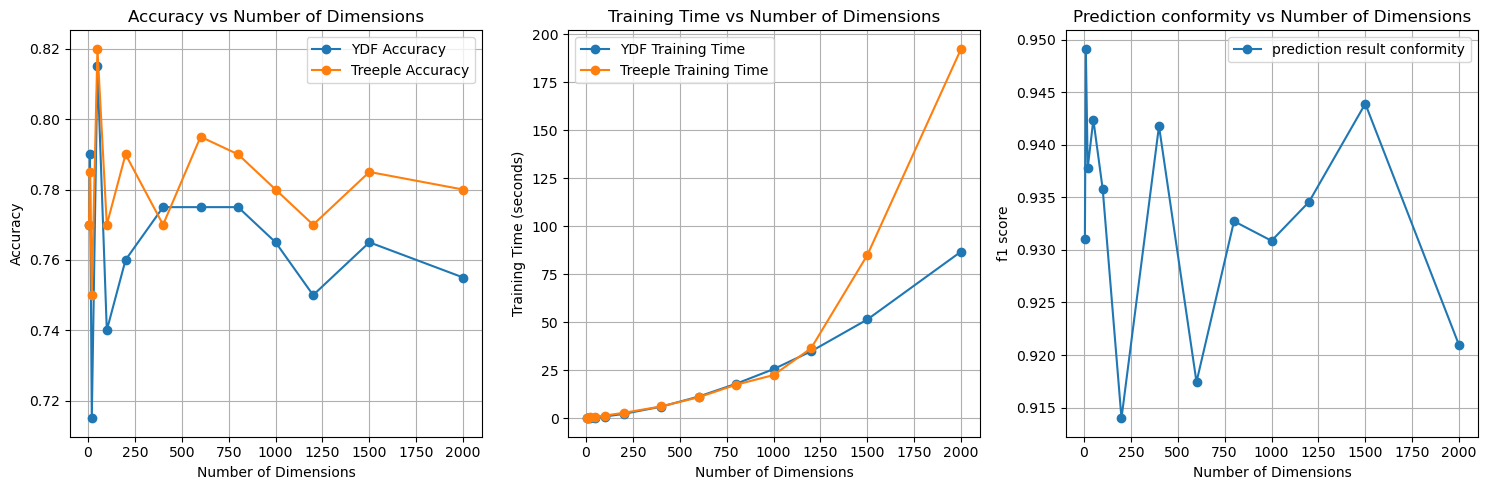

: 

In [ ]:


fig, ax1 = plt.subplots(1,3, figsize=(15, 5))

# Plot accuracy
ax1[0].plot(num_dims, accs_ydf, label='YDF Accuracy', marker='o')
ax1[0].plot(num_dims, accs_treeple, label='Treeple Accuracy', marker='o')
ax1[0].set_xlabel('Number of Dimensions')
ax1[0].set_ylabel('Accuracy')
ax1[0].set_title('Accuracy vs Number of Dimensions')
ax1[0].legend()
ax1[0].grid(True)

# Plot training time
ax1[1].plot(num_dims, times_ydf, label='YDF Training Time', marker='o')
ax1[1].plot(num_dims, times_treeple, label='Treeple Training Time', marker='o')
ax1[1].set_xlabel('Number of Dimensions')
ax1[1].set_ylabel('Training Time (seconds)')
ax1[1].set_title('Training Time vs Number of Dimensions')
ax1[1].legend()
ax1[1].grid(True)

# Plot training time
ax1[2].plot(num_dims, f1_scores, label='prediction result conformity', marker='o')
ax1[2].set_xlabel('Number of Dimensions')
ax1[2].set_ylabel('f1 score')
ax1[2].set_title('Prediction conformity vs Number of Dimensions')
ax1[2].legend()
ax1[2].grid(True)

plt.tight_layout()
plt.show()

## train with default hyperparameter

In [65]:
# num_dims = [100, 500, 1000, 1500, 2000, 3000, 4000, 10000]
accs_ydf_default = []
times_ydf_default = []
accs_treeple_default = []
times_treeple_default = []
# n_rep = 5

for n_dim in num_dims:
    print(f"Dimension: {n_dim}")

    X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim, n_informative=600, seed=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    df_train = prepare_dataframe(X_train, y_train)
    df_test = prepare_dataframe(X_test, y_test)

    # --- Train YDF ---
    acc_temp=0
    time_temp=0
    for _ in range(n_rep):
        
        
        learner = ydf.RandomForestLearner(**params_ydf_default)
        start_time = time.time()
        ydf_model = learner.train(df_train)
        time_ydf = time.time() - start_time
        y_pred = ydf_model.predict(df_test)
        y_pred = (y_pred >= 0.5).astype(int) 

        acc_ydf = accuracy_score(y_test, y_pred)
        acc_temp+=acc_ydf
        time_temp+=time_ydf
    accs_ydf_default.append(acc_temp/n_rep)
    times_ydf_default.append(time_temp/n_rep)

    # --- Train Treeple ---
    acc_temp=0
    time_temp=0
    for _ in range(n_rep):
        treeple_model = ObliqueRandomForestClassifier(**params_treeple_default)
        acc_treeple, time_treeple = train_and_evaluate(treeple_model, "Treeple", X_train, X_test, y_train, y_test)
        acc_temp+=acc_treeple
        time_temp+=time_treeple
    accs_treeple_default.append(acc_temp/n_rep)
    times_treeple_default.append(time_temp/n_rep)

Dimension: 100
Train model on 800 examples
Model trained in 0:00:00.116731


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 100. Setting n_informative to n_dim.
  warnings.warn(


Train model on 800 examples
Model trained in 0:00:00.114712
Train model on 800 examples
Model trained in 0:00:00.096630
Train model on 800 examples
Model trained in 0:00:00.119874
Train model on 800 examples
Model trained in 0:00:00.102908
Treeple: Accuracy = 0.8250, Training Time = 1.3614 sec
Treeple: Accuracy = 0.7800, Training Time = 1.3503 sec
Treeple: Accuracy = 0.8100, Training Time = 1.3545 sec
Treeple: Accuracy = 0.8000, Training Time = 1.3628 sec
Treeple: Accuracy = 0.7900, Training Time = 1.3748 sec
Dimension: 500
Train model on 800 examples


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 500. Setting n_informative to n_dim.
  warnings.warn(


Model trained in 0:00:00.301103
Train model on 800 examples
Model trained in 0:00:00.267104
Train model on 800 examples
Model trained in 0:00:00.270172
Train model on 800 examples
Model trained in 0:00:00.298567
Train model on 800 examples
Model trained in 0:00:00.260217
Treeple: Accuracy = 0.8250, Training Time = 3.7896 sec
Treeple: Accuracy = 0.8150, Training Time = 3.8593 sec
Treeple: Accuracy = 0.8200, Training Time = 3.9541 sec
Treeple: Accuracy = 0.8100, Training Time = 3.9780 sec
Treeple: Accuracy = 0.8000, Training Time = 3.9829 sec
Dimension: 1000
Train model on 800 examples
Model trained in 0:00:00.514437
Train model on 800 examples
Model trained in 0:00:00.585743
Train model on 800 examples
Model trained in 0:00:00.599866
Train model on 800 examples
Model trained in 0:00:00.579885
Train model on 800 examples
Model trained in 0:00:00.555408
Treeple: Accuracy = 0.8200, Training Time = 6.9644 sec
Treeple: Accuracy = 0.8100, Training Time = 6.9646 sec
Treeple: Accuracy = 0.8250,

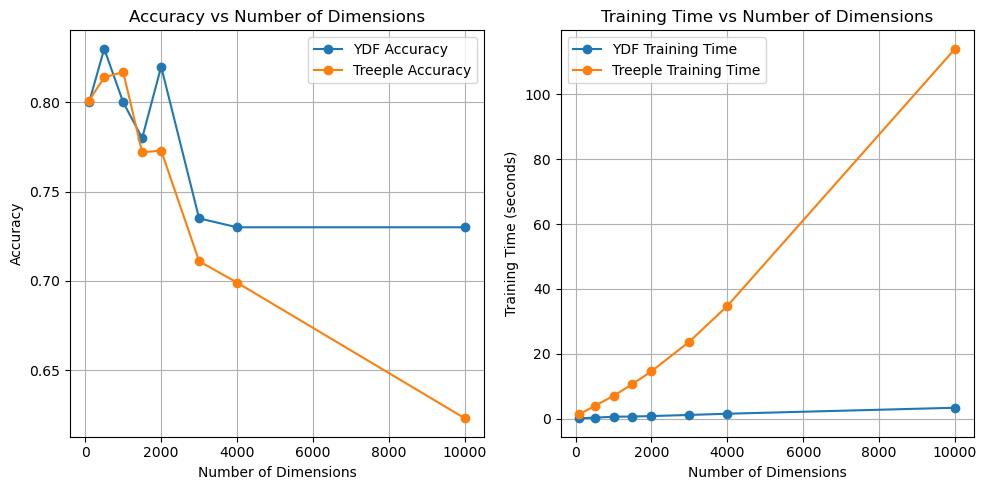

In [66]:
fig, ax1 = plt.subplots(1,2, figsize=(10, 5))

# Plot accuracy
ax1[0].plot(num_dims, accs_ydf_default, label='YDF Accuracy', marker='o')
ax1[0].plot(num_dims, accs_treeple_default, label='Treeple Accuracy', marker='o')
ax1[0].set_xlabel('Number of Dimensions')
ax1[0].set_ylabel('Accuracy')
ax1[0].set_title('Accuracy vs Number of Dimensions')
ax1[0].legend()
ax1[0].grid(True)

# Plot training time
ax1[1].plot(num_dims, times_ydf_default, label='YDF Training Time', marker='o')
ax1[1].plot(num_dims, times_treeple_default, label='Treeple Training Time', marker='o')
ax1[1].set_xlabel('Number of Dimensions')
ax1[1].set_ylabel('Training Time (seconds)')
ax1[1].set_title('Training Time vs Number of Dimensions')
ax1[1].legend()
ax1[1].grid(True)

plt.tight_layout()
plt.show()

# decrease number of dimensions, increase number of trees

In [4]:
# Shared hyperparameters that used for both models
MAX_DEPTH = 10
N_ESTIMATORS = 1000
RANDOM_SEED = 42
N_JOBS=-1
BOOTSTRAP = True

### ydf ###
params_ydf = dict()
params_ydf["label"] = "target"
params_ydf["max_depth"] = MAX_DEPTH
params_ydf["num_trees"] = N_ESTIMATORS
params_ydf["random_seed"] = RANDOM_SEED
params_ydf["honest"] = False
params_ydf["bootstrap_size_ratio"] = 1.0
params_ydf["bootstrap_training_dataset"] = BOOTSTRAP
params_ydf["categorical_algorithm"] = "ONE_HOT"
params_ydf["split_axis"] = "SPARSE_OBLIQUE"
params_ydf["compute_oob_performances"] = False
params_ydf["compute_oob_variable_importances"] = False
params_ydf["max_num_nodes"] = None
params_ydf["growing_strategy"] = "BEST_FIRST_GLOBAL"
params_ydf["num_candidate_attributes"] = 1  #0 equivalent to sqrt max_features in treeple
params_ydf["sorting_strategy"] = "IN_NODE" ###
# sparse oblique params
params_ydf["sparse_oblique_weights"] = "CONTINUOUS"
params_ydf["sparse_oblique_projection_density_factor"] = 1.0
params_ydf["sparse_oblique_normalization"] = "MIN_MAX"
params_ydf["sparse_oblique_max_num_projections"] = 6000 # modify this, find in sourse code in treeple
params_ydf["sparse_oblique_num_projections_exponent"] = 1.0   #2.0
params_ydf["sampling_with_replacement"] = False

### treeple ObliqueRandomForestClassifier ###
params_treeple = {}
params_treeple["n_estimators"] = N_ESTIMATORS
params_treeple["criterion"] = "entropy"
params_treeple["max_depth"] = None
params_treeple["min_samples_split"] = 2
params_treeple["min_samples_leaf"] = 1
params_treeple["min_weight_fraction_leaf"] = 0.0
params_treeple["max_features"] = 1.0 #"sqrt" #100
params_treeple["max_leaf_nodes"] = None
params_treeple["min_impurity_decrease"] = 0.0
params_treeple["bootstrap"] = BOOTSTRAP
params_treeple["oob_score"] = False
params_treeple["n_jobs"] = N_JOBS
params_treeple["random_state"] = RANDOM_SEED
params_treeple["verbose"] = 0
params_treeple["warm_start"] = False
params_treeple["class_weight"] = None
params_treeple["max_samples"] = None
params_treeple["feature_combinations"] = 1.0


In [11]:
#num_dims = [100, 500, 1000, 1500, 2000, 3000, 4000, 10000]
num_dims = [5, 10,  20, 50, 100, 200, 400, 600, 800]
n_trees = [100, 200, 500, 1000] 
accs_ydf = []
times_ydf = []
accs_treeple = []
times_treeple = []
f1_scores = []
n_rep = 5


n_dim=200
for n_tree in n_trees:
    print(f"n tree: {n_tree}")
    params_ydf["num_trees"] = n_tree
    params_treeple["n_estimators"] = n_tree

    X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim, n_informative=600, seed=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    df_train = prepare_dataframe(X_train, y_train)
    df_test = prepare_dataframe(X_test, y_test)

    
    acc_temp_ydf=0
    time_temp_ydf=0

    acc_temp_treeple=0
    time_temp_treeple=0

    f1_temp=0

    for _ in range(n_rep):
        # --- Train YDF ---
        learner = ydf.RandomForestLearner(**params_ydf)
        start_time = time.time()
        ydf_model = learner.train(df_train)
        time_ydf = time.time() - start_time
        pred_ydf = ydf_model.predict(df_test)
        pred_ydf = (pred_ydf >= 0.5).astype(int) 

        acc_ydf = accuracy_score(y_test, pred_ydf)
        acc_temp_ydf+=acc_ydf
        time_temp_ydf+=time_ydf
    
        # --- Train Treeple ---
        treeple_model = ObliqueRandomForestClassifier(**params_treeple)
        acc_treeple, time_treeple, pred_treeple = train_and_evaluate(treeple_model, "Treeple", X_train, X_test, y_train, y_test)
        acc_temp_treeple+=acc_treeple
        time_temp_treeple+=time_treeple

        # Calculate F1 score for two predictions
        f1_compare = f1_score(pred_ydf, pred_treeple)
        f1_temp+=f1_compare

    accs_ydf.append(acc_temp_ydf/n_rep)
    times_ydf.append(time_temp_ydf/n_rep)

    accs_treeple.append(acc_temp_treeple/n_rep)
    times_treeple.append(time_temp_treeple/n_rep)

    f1_scores.append(f1_temp/n_rep)

n tree: 100
Train model on 800 examples


c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 200. Setting n_informative to n_dim.
  warnings.warn(


Model trained in 0:00:00.543757
Treeple: Accuracy = 0.7800, Training Time = 0.6771 sec
Train model on 800 examples
Model trained in 0:00:00.505208
Treeple: Accuracy = 0.7800, Training Time = 0.6556 sec
Train model on 800 examples
Model trained in 0:00:00.504515
Treeple: Accuracy = 0.7800, Training Time = 0.6611 sec
Train model on 800 examples
Model trained in 0:00:00.496152
Treeple: Accuracy = 0.7800, Training Time = 0.6508 sec
Train model on 800 examples
Model trained in 0:00:00.477117
Treeple: Accuracy = 0.7800, Training Time = 0.6381 sec
n tree: 200
Train model on 800 examples


c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 200. Setting n_informative to n_dim.
  warnings.warn(


Model trained in 0:00:00.916938
Treeple: Accuracy = 0.8100, Training Time = 1.2301 sec
Train model on 800 examples
Model trained in 0:00:00.914770
Treeple: Accuracy = 0.8100, Training Time = 1.1961 sec
Train model on 800 examples
Model trained in 0:00:00.923724
Treeple: Accuracy = 0.8100, Training Time = 1.2214 sec
Train model on 800 examples
Model trained in 0:00:00.929064
Treeple: Accuracy = 0.8100, Training Time = 1.2538 sec
Train model on 800 examples
Model trained in 0:00:00.921258
Treeple: Accuracy = 0.8100, Training Time = 1.2229 sec
n tree: 500
Train model on 800 examples


c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 200. Setting n_informative to n_dim.
  warnings.warn(


Model trained in 0:00:02.253882
Treeple: Accuracy = 0.7900, Training Time = 2.9391 sec
Train model on 800 examples
Model trained in 0:00:02.293938
Treeple: Accuracy = 0.7900, Training Time = 2.9232 sec
Train model on 800 examples
Model trained in 0:00:02.263578
Treeple: Accuracy = 0.7900, Training Time = 2.9211 sec
Train model on 800 examples
Model trained in 0:00:02.311457
Treeple: Accuracy = 0.7900, Training Time = 2.8465 sec
Train model on 800 examples
Model trained in 0:00:02.288125
Treeple: Accuracy = 0.7900, Training Time = 2.8442 sec
n tree: 1000
Train model on 800 examples


c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 200. Setting n_informative to n_dim.
  warnings.warn(


Model trained in 0:00:04.535782
Treeple: Accuracy = 0.7900, Training Time = 5.7054 sec
Train model on 800 examples
Model trained in 0:00:04.553944
Treeple: Accuracy = 0.7900, Training Time = 5.7373 sec
Train model on 800 examples
Model trained in 0:00:04.520608
Treeple: Accuracy = 0.7900, Training Time = 5.7239 sec
Train model on 800 examples
Model trained in 0:00:04.511709
Treeple: Accuracy = 0.7900, Training Time = 5.7278 sec
Train model on 800 examples
Model trained in 0:00:04.568363
Treeple: Accuracy = 0.7900, Training Time = 5.7329 sec


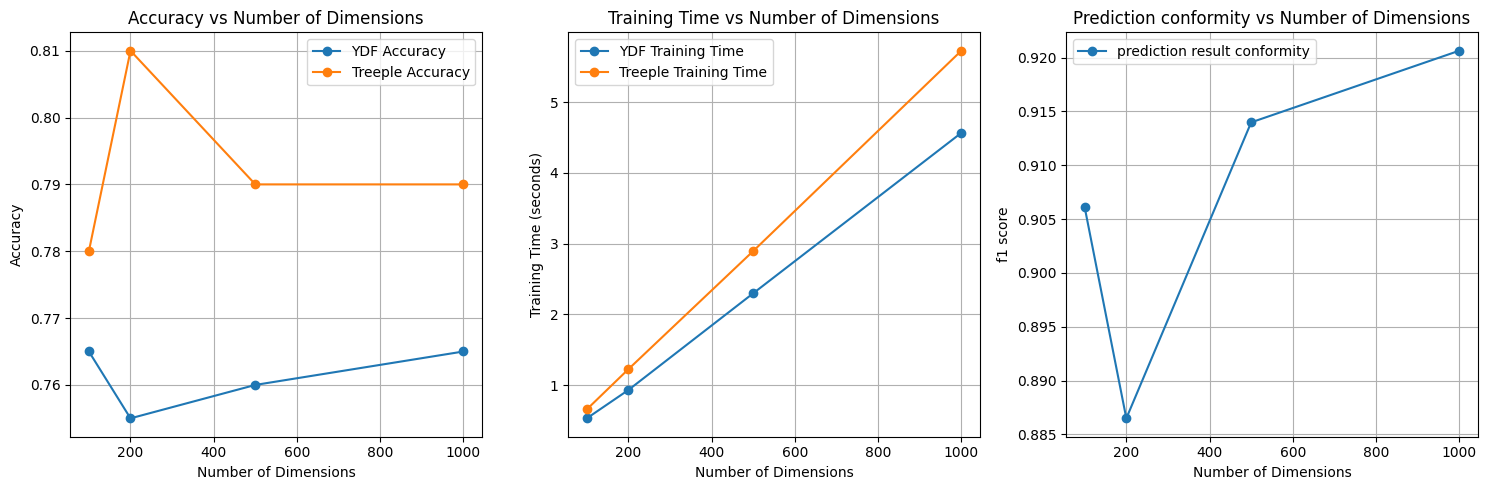

In [13]:


fig, ax1 = plt.subplots(1,3, figsize=(15, 5))

# Plot accuracy
ax1[0].plot(n_trees, accs_ydf, label='YDF Accuracy', marker='o')
ax1[0].plot(n_trees, accs_treeple, label='Treeple Accuracy', marker='o')
ax1[0].set_xlabel('Number of Dimensions')
ax1[0].set_ylabel('Accuracy')
ax1[0].set_title('Accuracy vs Number of Dimensions')
ax1[0].legend()
ax1[0].grid(True)

# Plot training time
ax1[1].plot(n_trees, times_ydf, label='YDF Training Time', marker='o')
ax1[1].plot(n_trees, times_treeple, label='Treeple Training Time', marker='o')
ax1[1].set_xlabel('Number of Dimensions')
ax1[1].set_ylabel('Training Time (seconds)')
ax1[1].set_title('Training Time vs Number of Dimensions')
ax1[1].legend()
ax1[1].grid(True)

# Plot training time
ax1[2].plot(n_trees, f1_scores, label='prediction result conformity', marker='o')
ax1[2].set_xlabel('Number of Dimensions')
ax1[2].set_ylabel('f1 score')
ax1[2].set_title('Prediction conformity vs Number of Dimensions')
ax1[2].legend()
ax1[2].grid(True)

plt.tight_layout()
plt.show()

In [15]:
def train_ydf(X_train, y_train, X_test, y_test, params_ydf):
    df_train = prepare_dataframe(X_train, y_train)
    df_test = prepare_dataframe(X_test, y_test)

    learner = ydf.RandomForestLearner(**params_ydf)
    start_time = time.time()
    ydf_model = learner.train(df_train)
    time_ydf = time.time() - start_time
    y_pred = ydf_model.predict(df_test)
    y_pred_class = (y_pred >= 0.5).astype(int) 

    acc_ydf = accuracy_score(y_test, y_pred_class)

    print(f"YDF | Dim: {n_dim} | Accuracy: {acc_ydf:.4f} | Train Time: {time_ydf:.4f} sec")
    return acc_ydf, time_ydf, y_pred_class

In [21]:
def compare_confusion_matrix(n_tree, n_dim, n_samples, params_treeple1, params_ydf1):
    n_tree = 100
    n_dim = 200
    n_samples = 2000
    X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim, n_informative=600, seed=0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    params_treeple = params_treeple1.copy()  # Copy the original params for treeple
    params_ydf = params_ydf1.copy()  # Copy the original params for ydf
    params_treeple["n_estimators"] = n_tree
    params_ydf["num_trees"] = n_tree

    # treeple
    treeple_model = ObliqueRandomForestClassifier(**params_treeple)
    acc_treeple, time_treeple, pred_treeple = train_and_evaluate(treeple_model, "Treeple", X_train, X_test, y_train, y_test)

    # ydf
    acc_ydf, time_ydf, y_pred_class = train_ydf(X_train, y_train, X_test, y_test, params_ydf)


    conf_matrix_ydf = confusion_matrix(pred_treeple, y_pred_class)
    print("Confusion Matrix for YDF Predictions:")
    print(conf_matrix_ydf)

compare_confusion_matrix(100, 200, 2000, params_treeple, params_ydf)

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 200. Setting n_informative to n_dim.
  warnings.warn(


Treeple: Accuracy = 0.8025, Training Time = 1.4917 sec
Train model on 1600 examples
Model trained in 0:00:00.892712
YDF | Dim: 200 | Accuracy: 0.7675 | Train Time: 0.9002 sec
Confusion Matrix for YDF Predictions:
[[184  19]
 [ 15 182]]


In [23]:
compare_confusion_matrix(500, 1784, 1000, params_treeple, params_ydf)

c:\Users\clark\anaconda3\envs\catboost_env\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 200. Setting n_informative to n_dim.
  warnings.warn(


Treeple: Accuracy = 0.8025, Training Time = 1.4687 sec
Train model on 1600 examples
Model trained in 0:00:00.887639
YDF | Dim: 200 | Accuracy: 0.7675 | Train Time: 0.8941 sec
Confusion Matrix for YDF Predictions:
[[184  19]
 [ 15 182]]
